<div style="background: #FFF3AB; border: solid 2px #FFE758; border-radius: 5px; width: 60%; padding: 20px; font-weight: 600; color: #6D6C68; letter-spacing: 0.5;">
WARNING: <br /><br />
<div style="font-weight: 200">When running locally you must cd in the following cell into the root of the cloned repo.</div>
</div>

In [11]:
cd /Users/dharness/dev/seam/

/Users/dharness/dev/seam


In [21]:
%load_ext autoreload
import matplotlib.pyplot as plt
from scipy import misc
from scipy.ndimage.filters import gaussian_filter
import numpy as np
from IPython.display import Image
from seam_carver import (
    apply_filter,
    normalize,
    compute_eng_grad,
    compute_eng_color,
    compute_eng,
    remove_seam,
    add_seam,
    find_seams,
    get_best_seam,
    reduce_width,
    reduce_height,
    increase_width,
    increase_height,
    intelligent_resize
)
from importlib import reload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Original Image

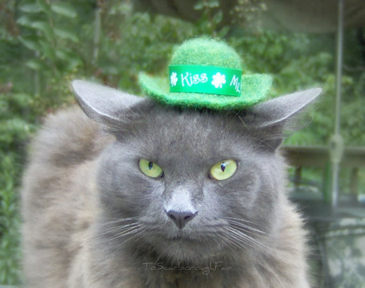

In [14]:
Image(filename='./demo/cat.png')

### Simple Energy Gradient with Sobel Filter

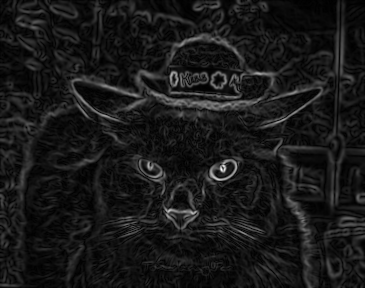

In [15]:
cat_img = misc.imread('./demo/cat.png')
eng = compute_eng_grad(cat_img)
misc.imsave('./demo/cat_eng_grad.png', eng)
Image(filename='./demo/cat_eng_grad.png')

### Simple Color Energy

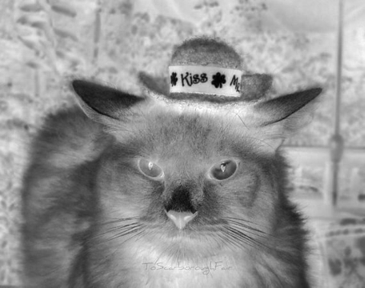

In [16]:
rgb_weights = [-3, 1, -3]
cat_img = misc.imread('./demo/cat.png')
eng = compute_eng_color(cat_img, rgb_weights)
misc.imsave('./demo/cat_eng_color.png', eng)
Image(filename='./demo/cat_eng_color.png')

### Total Energy

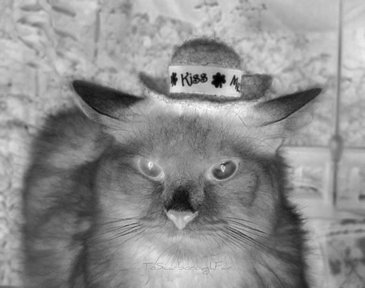

In [17]:
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
mask = np.zeros(cat_img.shape)
img4 = np.dstack((cat_img, mask))
eng = compute_eng(img4, rgb_weights, mask_weight)
misc.imsave('./demo/cat_eng_total.png', eng)
Image(filename='./demo/cat_eng_total.png')

### Add Seam

35.0650262344


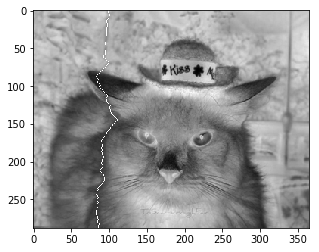

In [45]:
%autoreload
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
dims = (cat_img.shape[0], cat_img.shape[1])

img4 = np.dstack((
    cat_img,
    np.zeros(dims)
))
eng = compute_eng(img4, rgb_weights, mask_weight)
seam, adjusted_img4, cost, adjusted_eng = increase_width(img4, eng)

%matplotlib inline
plt.imshow(adjusted_eng, cmap='gray')

35.0650262344


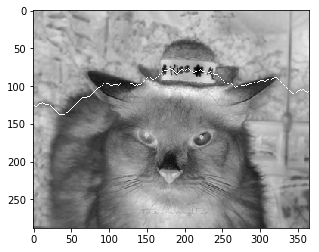

In [47]:
%autoreload
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
dims = (cat_img.shape[0], cat_img.shape[1])

img4 = np.dstack((
    cat_img,
    np.zeros(dims)
))
eng = compute_eng(img4, rgb_weights, mask_weight)
seam, adjusted_img4, cost, adjusted_eng = increase_height(img4, eng)

%matplotlib inline
plt.imshow(adjusted_eng, cmap='gray')

## Intelligent Resize

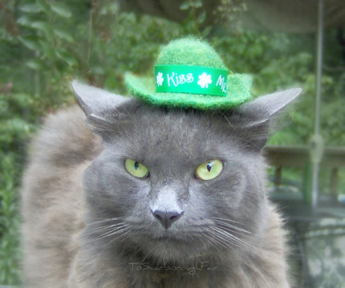

In [54]:
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
mask = np.zeros(cat_img.shape)

resized_img = intelligent_resize(cat_img, 0, -20, rgb_weights, mask, mask_weight)
misc.imsave('./demo/cat_shrunk.png', resized_img[:,:,0:3])
Image(filename='./demo/cat_shrunk.png')

True


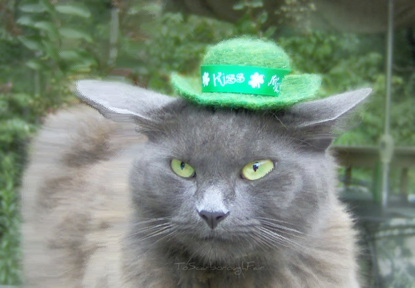

In [71]:
%autoreload
resized_img = intelligent_resize(cat_img, 0, 50, rgb_weights, mask, mask_weight)
misc.imsave('./demo/cat_grown.png', resized_img[:,:,0:3])
Image(filename='./demo/cat_grown.png')

True


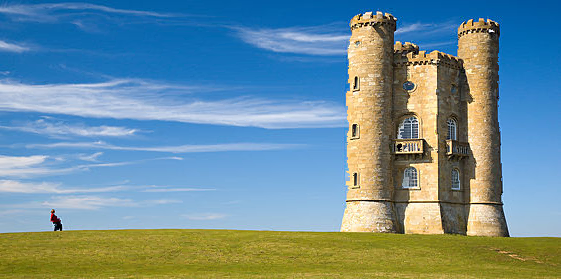

In [72]:
castle_img = misc.imread('./demo/castle_small.jpg')
castle_mask = np.zeros(castle_img.shape)
resized_img = intelligent_resize(castle_img, 0, 150, [0,0,0], castle_mask, mask_weight)
misc.imsave('./demo/castle_small_shrunk.png', resized_img[:,:,0:3])
Image(filename='./demo/castle_small_shrunk.png')